# ANN_Churn_Analysis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [27]:
df = pd.read_csv("OnlineNewsPopularity.csv")
df.shape

(39644, 61)

# Visualizing Missing Values


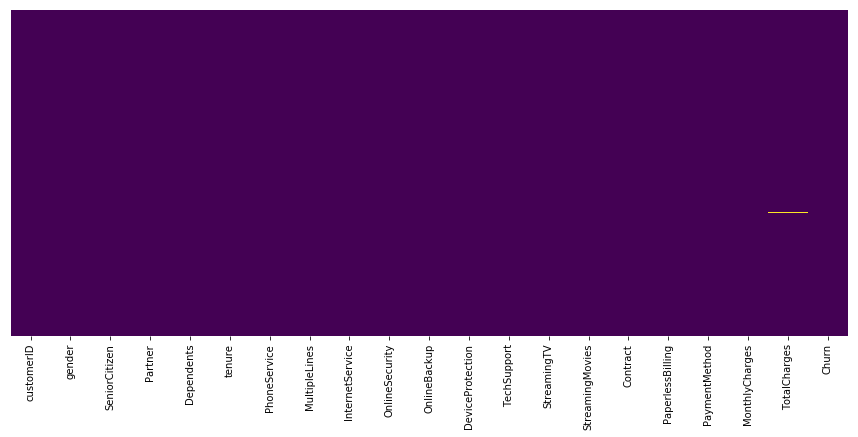

In [28]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df= df.replace(' ', np.NaN)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df['TotalCharges']=df['TotalCharges'].astype("float")

In [29]:
# Checking Missing Values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Dropping 11 Missing Values = 1.5 % of the Data¶


In [30]:
df.dropna(inplace=True)


In [31]:
df.head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Dropping Customer Id


In [32]:
df.drop(["customerID"],axis=1,inplace=True)

# Getting all dummy variables from categorical variables and 
# dropping variables to avoid "dummy variable trap"


In [48]:
df2 = pd.get_dummies(df)
df2.drop(["StreamingTV_No","StreamingMovies_No","Contract_Month-to-month","PaperlessBilling_No","PaymentMethod_Mailed check","Churn_No","gender_Male","Partner_No","Dependents_No","PhoneService_No","MultipleLines_No","InternetService_DSL","OnlineSecurity_No","OnlineBackup_No","DeviceProtection_No","TechSupport_No"],axis =1 , inplace=True)

# New Dataset

In [51]:
df2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Churn_Yes
0,0,1,29.85,29.85,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2,53.85,108.15,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,2,70.70,151.65,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
5,0,8,99.65,820.50,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,1,1
6,0,22,89.10,1949.40,0,0,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
7,0,10,29.75,301.90,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,28,104.80,3046.05,1,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,1
9,0,62,56.15,3487.95,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [53]:
df2.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                uint8
Partner_Yes                                  uint8
Dependents_Yes                               uint8
PhoneService_Yes                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No internet service             uint8
OnlineBackup_Yes                             uint8
DeviceProtection_No internet service         uint8
DeviceProtection_Yes                         uint8
TechSupport_No internet service              uint8
TechSupport_Yes                

In [57]:
cols = df2.shape[1]

features = df2.iloc[:,:cols-1]
response = df2.iloc[:,cols-1:cols]

X_train, X_test, y_train, y_test = train_test_split(features,response,test_size=0.3,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)


In [59]:
# Importing the dataset


# Encoding categorical data
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X_1 = LabelEncoder()
#X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
#labelencoder_X_2 = LabelEncoder()
#X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
#onehotencoder = OneHotEncoder(categorical_features = [1])
#X = onehotencoder.fit_transform(X).toarray()
#X = X[:, 1:]

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

Epoch 1/20
3445/3445 [==============================] - 1s 260us/step - loss: 0.5656 - acc: 0.7631
Epoch 2/20
3445/3445 [==============================] - 0s 144us/step - loss: 0.5064 - acc: 0

In [60]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [61]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 80.29%
Test accuracy = 79.72%


# Experiment 1 

## Number of hidden layers in NN

In [67]:
accuracy_validation = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 30))
    i=0
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)

Epoch 1/4
3445/3445 [==============================] - 2s 468us/step - loss: 0.5619 - acc: 0.7628

Text(0,0.5,'Accuracy on Validation Set')

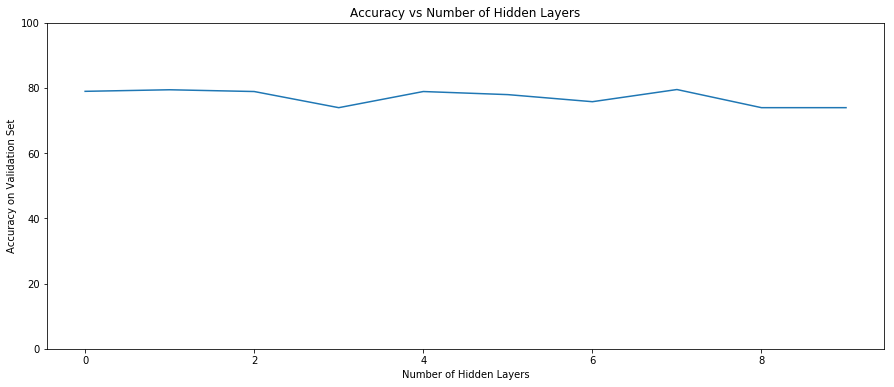

In [68]:
plt.ylim([0,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

## As we see, Number of Hidden layers won't increase significant accuracy,
## we will keep only 1 hidden layer in the NN

# Experiment 2 
# No of Nodes in Hidden Layer

In [65]:
accuracy_validation = [None]*10
count = 0
for NoOfNodes in range(10,20):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = 30))
    
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

Epoch 1/4
3445/3445 [==============================] - 1s 383us/step - loss: 0.5750 - acc: 0.7303

Text(0,0.5,'Accuracy on Validation Set')

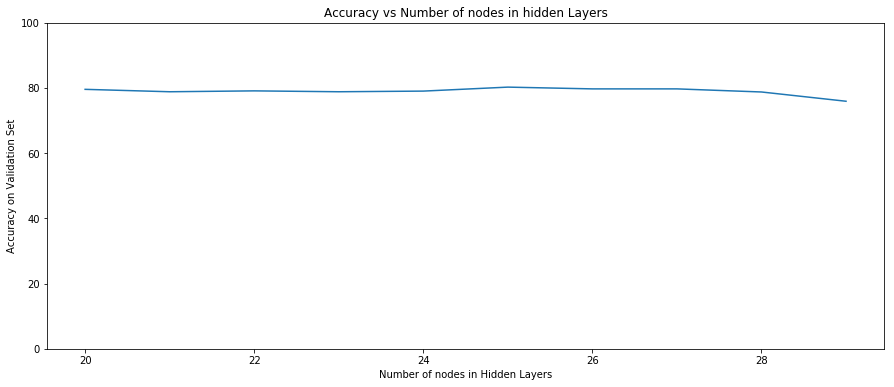

In [66]:
plt.ylim([0,100])
plt.plot(range(20,30),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

## As we see from above experiment , No of layers according to our data set doesn't really change the accuracy of the validation set, 

## I will go ahead with 16 number of Nodes

## Best guess is average of output layer and no of features, that is 30+1 / 2 ~ 16  

# Experiment 3 

# Changing activation functions (sigmoid, tanh, etc.)

In [69]:
accuracy_validation = [None]*3
count = 0
activationFunc = ['relu','sigmoid','tanh']
for activation_Func in range(len(activationFunc)):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 30))
    
    classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = activationFunc[activation_Func]))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

Epoch 1/4
3445/3445 [==============================] - 2s 678us/step - loss: 4.3465 - acc: 0.7303

Text(0,0.5,'Accuracy on Validation Set')

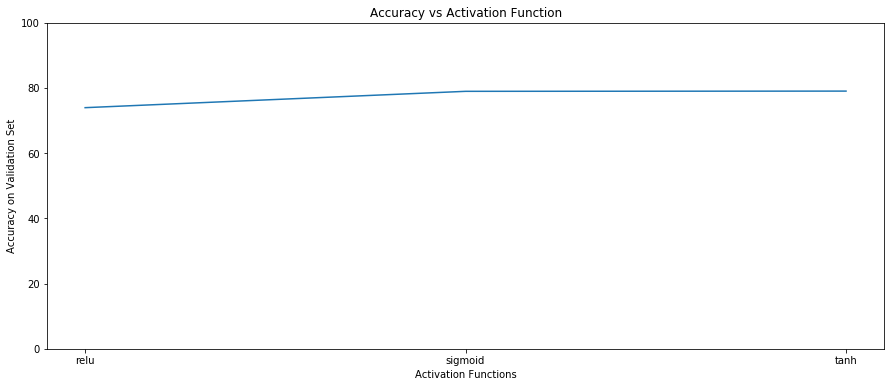

In [70]:
plt.ylim([0,100])
plt.plot(activationFunc,accuracy_validation)
plt.title("Accuracy vs Activation Function")
plt.xlabel("Activation Functions")
plt.ylabel("Accuracy on Validation Set")

## According to the experimentation on validation set,

## We will use Sigmoid activation function for the Output Layer

# Experiment 4

# Batch size for error back propagation

In [72]:
accuracy_validation = [None]*10
count = 0
for batchSize in range(5,15):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 30))
    classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, nb_epoch = 3)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

Epoch 1/3
3445/3445 [==============================] - 3s 1ms/step - loss: 4.3465 - acc: 0.7303

Text(0,0.5,'Accuracy on Validation Set')

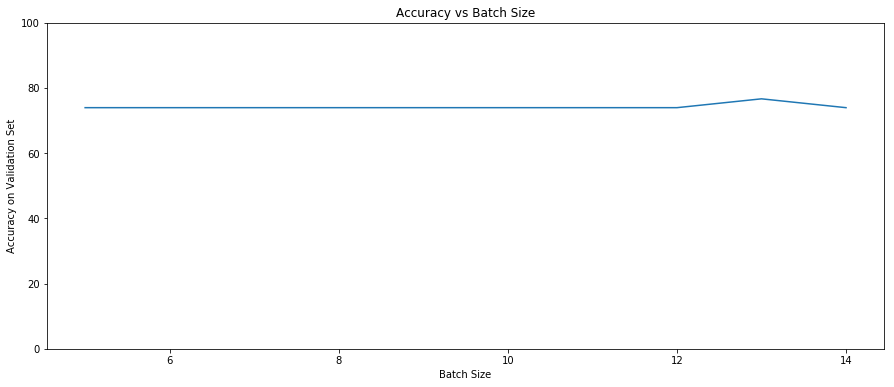

In [73]:
plt.ylim([0,100])
plt.plot(range(5,15),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

# I will stick with Batch size = 10

# Final NN after doing Hyper parameter tuning 

In [74]:
# Final NNclassifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

Epoch 1/20
3445/3445 [==============================] - 3s 914us/step - loss: 0.5880 - acc: 0.7292

In [75]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))
print('Validation accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)))

Train accuracy = 79.25%
Test accuracy = 77.91%
Validation accuracy = 78.74%
